Assignment: Flowers Recognition Dataset Description:

This dataset contains 4242 images of flowers.

The data collection is based on the data flicr, google images, yandex images.

You can use this datastet to recognize plants from the photo.

Attribute Information:

The pictures are divided into five classes: chamomile, tulip, rose, sunflower, dandelion.

For each class there are about 800 photos. Photos are not high resolution, about 320x240 pixels.

Also explore how to resize images in tensorflow and then resize all the images to a same size.

This is a Multiclass Classification Problem.

WORKFLOW :

Load Data

Split into 60 and 40 ratio.

Encode labels.

Create Model

Compilation Step (Note : Its a Multiclass Classification problem , select loss , metrics according to it)

Train the Model.

If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .

Prediction should be > 85%

Evaluation Step

Prediction

Data : https://drive.google.com/file/d/1-OX6wn5gA-bJpjPNfSyaYQLz-A-AB_uj/view?usp=sharing


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import RMSprop


In [3]:
import glob
import cv2
import numpy as np

with tf.device('/device:GPU:0'):

  daisy = '/content/drive/MyDrive/Colab Notebooks/flowers/daisy'
  dandelion = '/content/drive/MyDrive/Colab Notebooks/flowers/dandelion'
  rose = '/content/drive/MyDrive/Colab Notebooks/flowers/rose'
  sunflower = '/content/drive/MyDrive/Colab Notebooks/flowers/sunflower'
  tulip = '/content/drive/MyDrive/Colab Notebooks/flowers/tulip'
  
  def read_images(directory):
      for img in glob.glob(directory+"/*.jpg"):
          image = cv2.imread(img)
          resized_img = cv2.resize(image/255.0  , (150 , 150))

          yield resized_img

  resized_imgs0 =  np.array(list(read_images(daisy)))
  resized_imgs1 =  np.array(list(read_images(dandelion)))
  resized_imgs2 =  np.array(list(read_images(rose)))
  resized_imgs3 =  np.array(list(read_images(sunflower)))
  resized_imgs4 =  np.array(list(read_images(tulip)))

In [4]:
label0 = np.zeros((resized_imgs0.shape[0],1))   
label1 = np.ones((resized_imgs1.shape[0],1))  
label2 = np.ones((resized_imgs2.shape[0],1)) * 2 
label3 = np.ones((resized_imgs3.shape[0],1)) * 3 
label4 = np.ones((resized_imgs4.shape[0],1)) * 4  

In [5]:
data = np.concatenate((resized_imgs0,resized_imgs1,resized_imgs2,resized_imgs3,resized_imgs4))

In [6]:
data= data.reshape(data.shape[0], data.shape[1]*data.shape[2]*data.shape[3])

In [7]:
labels = np.concatenate((label0,label1,label2,label3,label4))

In [8]:
del resized_imgs0
del resized_imgs1
del resized_imgs2
del resized_imgs3
del resized_imgs4
del label0
del label1
del label2
del label3
del label4

In [9]:
import pandas as pd
data = pd.DataFrame(data)
data['labels'] = labels.astype('float32')

In [10]:
from sklearn.model_selection import train_test_split
train_data, test_data, train_labels, test_labels = train_test_split(data.iloc[0:,:-1], 
                                                                    data['labels'], test_size=0.3, random_state=42, stratify = labels)

In [11]:
train_data = np.array(train_data).reshape(len(train_data),150,150,3)
# test_data.reshape(150,150,3)

In [12]:
test_data = np.array(test_data).reshape(len(test_data),150,150,3)

In [13]:
train_labels = np.array(train_labels).astype('float32')
test_labels = np.array(test_labels).astype('float32')

In [14]:
# from keras.utils import to_categorical
# train_labels = to_categorical(train_labels)
# test_labels = to_categorical(test_labels)

In [14]:
data_gen = tf.keras.preprocessing.image.ImageDataGenerator(

    zca_epsilon=1e-06,
    rotation_range=0,
    width_shift_range=0.0,
    height_shift_range=0.0,
    brightness_range=None,
    shear_range=0.3,
    zoom_range=0.2,
    channel_shift_range=0.3,
    fill_mode="nearest",
    cval=0.0,
    horizontal_flip=True,
    vertical_flip=False,
    rescale=None,
    preprocessing_function=None,
    data_format=None,
    validation_split=0.0,
    dtype=None,
)

In [15]:
data_gen.fit(train_data)

In [16]:
data_gen.fit(test_data)

In [17]:
### Models with COnv2D and Maxpooling

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3,)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

In [18]:
model.compile(optimizer=RMSprop(learning_rate= 0.0001),
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

In [20]:
%tensorflow_version 2.x
import tensorflow as tf

In [21]:
with tf.device('/device:GPU:0'):
  result = model.fit(
          x= train_data,
          y= train_labels,
          batch_size = 30,
          steps_per_epoch=30,
          epochs=100,
          validation_split=0.3,
          validation_steps=10,
          validation_batch_size=10)

Epoch 1/100
30/30 [==============================] - 33s 90ms/step - loss: 1.6038 - accuracy: 0.2051 - val_loss: 1.5531 - val_accuracy: 0.2700
Epoch 2/100
30/30 [==============================] - 2s 59ms/step - loss: 1.5571 - accuracy: 0.3236 - val_loss: 1.4309 - val_accuracy: 0.5000
Epoch 3/100
30/30 [==============================] - 2s 76ms/step - loss: 1.4486 - accuracy: 0.3711 - val_loss: 1.2874 - val_accuracy: 0.5100
Epoch 4/100
30/30 [==============================] - 2s 59ms/step - loss: 1.3423 - accuracy: 0.4098 - val_loss: 1.1824 - val_accuracy: 0.5200
Epoch 5/100
30/30 [==============================] - 2s 59ms/step - loss: 1.2622 - accuracy: 0.4539 - val_loss: 1.1486 - val_accuracy: 0.5100
Epoch 6/100
30/30 [==============================] - 2s 59ms/step - loss: 1.2074 - accuracy: 0.4466 - val_loss: 1.1051 - val_accuracy: 0.5500
Epoch 7/100
30/30 [==============================] - 2s 58ms/step - loss: 1.2918 - accuracy: 0.4298 - val_loss: 1.0993 - val_accuracy: 0.5300
Epoch

In [22]:
model.evaluate(test_data,test_labels)

41/41 [==============================] - 2s 27ms/step - loss: 0.8430 - accuracy: 0.6782


[0.8430432081222534, 0.6782140135765076]

In [23]:
x = result.history.keys()
x

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

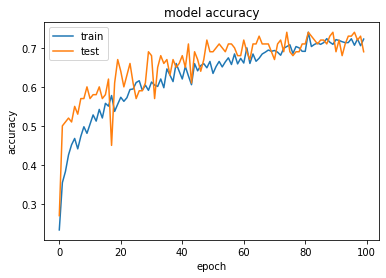

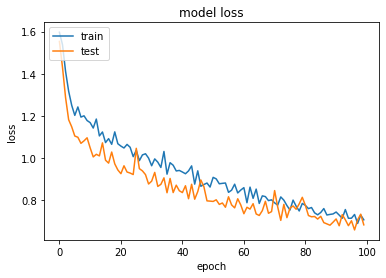

In [24]:

# Visualize training history
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy
plt.plot(result.history['accuracy'])
plt.plot(result.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [25]:
y_pred1 = model.predict(test_data)

In [26]:
y_pred1.shape

(1299, 5)

In [27]:
np.argmax(y_pred1, axis=1)[0:30]

array([3, 3, 2, 3, 3, 1, 2, 1, 3, 4, 4, 4, 3, 3, 0, 3, 3, 3, 4, 3, 1, 1,
       3, 1, 0, 4, 3, 1, 3, 3])

In [28]:
np.array(test_labels[0:30]).astype('int32')

array([3, 3, 2, 3, 3, 1, 4, 1, 3, 4, 4, 4, 3, 1, 0, 3, 3, 1, 4, 4, 1, 1,
       1, 1, 0, 4, 3, 3, 2, 3], dtype=int32)